In [92]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

#Initialize System Variables

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
ACTIONS_FIGS=['↑', '↓', '→', '←']

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

GAMMA = 1

START = [3, 0]
GOAL = [3, 7]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

#Step Function

This function advanced the state of the system

In [10]:
def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

#Episode Function

This function runs 1 episode of the system and updates the q function

In [39]:
# play for an episode
def episode(q_value, method = 'TD', Nstate_MC=np.zeros((WORLD_HEIGHT, WORLD_WIDTH,4))):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

    # keep going until get to the goal state
    if method == 'TD':
      while state != GOAL:
          next_state = step(state, action)
          if np.random.binomial(1, EPSILON) == 1:
              next_action = np.random.choice(ACTIONS)
          else:
              values_ = q_value[next_state[0], next_state[1], :]
              next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
          time += 1

          # Sarsa update YOUR CODE HERE
          q_value[state[0], state[1], action] += \
              ALPHA * (REWARD + GAMMA*q_value[next_state[0], next_state[1], next_action] -
                        q_value[state[0], state[1], action])
              
          state = next_state
          action = next_action

    if method == 'MC':
      states = [state]
      Reward = [-1]
      actions = [action]
      while state != GOAL:
          next_state = step(state, action)
          if np.random.binomial(1, EPSILON) == 1:
              next_action = np.random.choice(ACTIONS)
          else:
              values_ = q_value[next_state[0], next_state[1], :]
              next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
          time += 1

          
            
          state = next_state
          action = next_action
          states.append(state)
          Reward.append(REWARD)
          actions.append(action)
          
    
      G = 0
      visitedstates = []
      hashes = []
      #Last Visit MC
      for ind in range(len(states)):
        i = len(states)-ind-1
        state = states[i]
        hash = state[0]*WORLD_WIDTH + state[1]#create a unique id for each state
        if not(hash in hashes):
          hashes.append(hash)
          Nstate_MC[state[0], state[1], actions[i]] += 1
          q_value[state[0], state[1], actions[i]] += (G - q_value[state[0], state[1], actions[i]])/Nstate_MC[state[0], state[1],actions[i]]
        G = GAMMA*G + Reward[i]
        
    return time

#Train

Train TD

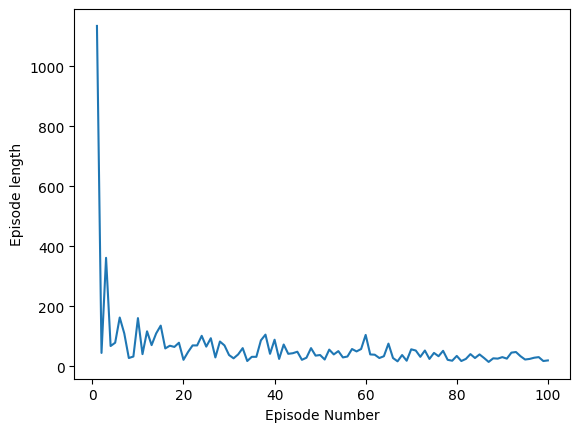

In [31]:
q_value_TD = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
episode_limit = 100

steps = []

for j in range(episode_limit):
    steps.append(episode(q_value_TD,method = 'TD'))


plt.plot(np.arange(1, len(steps) + 1),steps)
plt.xlabel('Episode Number')
plt.ylabel('Episode length')
plt.show()

MC Method

1.001001001001001

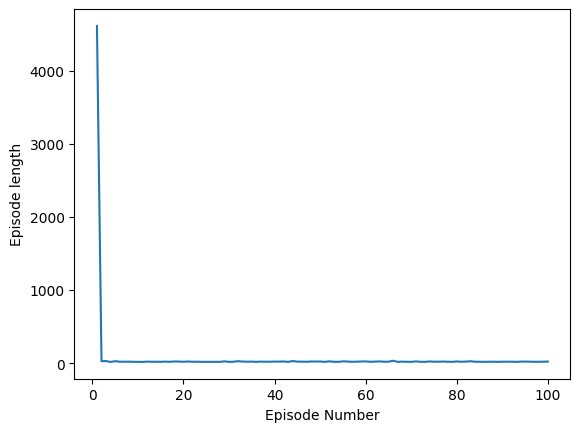

In [56]:
q_value_MC = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4)) - 200 #initialize more negative to favor explored states
N_MC = np.zeros((WORLD_HEIGHT, WORLD_WIDTH,4))

episode_limit = 100

steps = []
EPSILON = 0.1

for j in range(episode_limit):
    steps.append(episode(q_value_MC, method = 'MC',Nstate_MC=N_MC))

plt.plot(np.arange(1, len(steps) + 1),steps)
plt.xlabel('Episode Number')
plt.ylabel('Episode length')
plt.show()

#Plotting Functions

In [59]:
def plot_value(values):
  fig, ax = plt.subplots()
  ax.set_axis_off()
  tb = Table(ax, bbox=[0, 0, 1, 1])

  nrows, ncols = (WORLD_HEIGHT,WORLD_WIDTH)
  width, height = 1.0 / ncols, 1.0 / nrows
  for (i, j), val in np.ndenumerate(np.round(values, decimals=1)):
      fc = 'none'
      if [i, j] == GOAL:
          tb.add_cell(i, j, width, height, text='G', loc='left',
            edgecolor='none', facecolor='none')
          fc = 'green'
          #continue
      if [i, j] == START:
          tb.add_cell(i, j, width, height, text='S', loc='left',
            facecolor='none')
          fc = 'red'
      tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor=fc)

    # Row and column labels...
  for i in range(WORLD_HEIGHT):
      tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
  for i in range(WORLD_WIDTH):
      tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
      tb.add_cell(WORLD_HEIGHT, i, width, height/2, text=WIND[i], loc='center',
                    edgecolor='none', facecolor='none')
  tb.add_cell(WORLD_HEIGHT, -1, width, height, text='wind', loc='center',
                edgecolor='none', facecolor='none')
  
  tb.add_cell(3, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(3, -2, width, height, text='GOAL', loc='center',
                facecolor='green')
  tb.add_cell(1, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(1, -2, width, height, text='START', loc='center',
                facecolor='red')
  ax.add_table(tb)
  plt.show()


In [60]:
def plot_greedy_policy(q_value):
  fig, ax = plt.subplots()
  ax.set_axis_off()
  tb = Table(ax, bbox=[0, 0, 1, 1])

  nrows, ncols = (WORLD_HEIGHT,WORLD_WIDTH)
  width, height = 1.0 / ncols, 1.0 / nrows

  optimal_policy = []
  for i in range(0, WORLD_HEIGHT):
      optimal_policy.append([])
      for j in range(0, WORLD_WIDTH):
          fc = 'none'
          if [i, j] == GOAL:
              tb.add_cell(i, j, width, height, text='G', loc='left',
                edgecolor='none', facecolor='none')
              fc = 'green'
              #continue
          if [i, j] == START:
              tb.add_cell(i, j, width, height, text='S', loc='left',
                facecolor='none')
              fc = 'red'
              #continue
          bestAction = np.argmax(q_value[i, j, :])
          if bestAction == ACTION_UP:
              tb.add_cell(i, j, width, height, text='↑', loc='right',
              facecolor=fc)
          elif bestAction == ACTION_DOWN:
              tb.add_cell(i, j, width, height, text='↓', loc='right',
                facecolor=fc)
          elif bestAction == ACTION_LEFT:
              tb.add_cell(i, j, width, height, text='←', loc='right',
                facecolor=fc)
          elif bestAction == ACTION_RIGHT:
              tb.add_cell(i, j, width, height, text='→', loc='right',
                facecolor=fc)
              

                  # Row and column labels...
  for i in range(WORLD_HEIGHT):
      tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
  for i in range(WORLD_WIDTH):
      tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
      tb.add_cell(WORLD_HEIGHT, i, width, height/2, text=WIND[i], loc='center',
                    edgecolor='none', facecolor='none')
  tb.add_cell(WORLD_HEIGHT, -1, width, height, text='wind', loc='center',
                edgecolor='none', facecolor='none')

  tb.add_cell(3, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(3, -2, width, height, text='GOAL', loc='center',
                facecolor='green')
  tb.add_cell(1, -2, width, height, text='', loc='center',
                edgecolor='none', facecolor='none')
  tb.add_cell(1, -2, width, height, text='START', loc='center',
                facecolor='red')

  ax.add_table(tb)
  plt.show()

# Plot Value and Policy

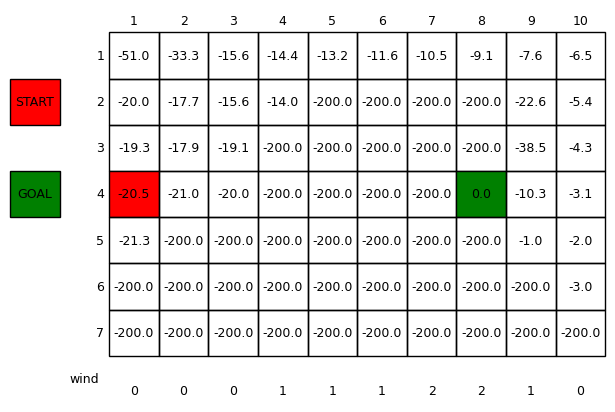

In [61]:
v = np.max(q_value_MC,axis=2)
plot_value(v)

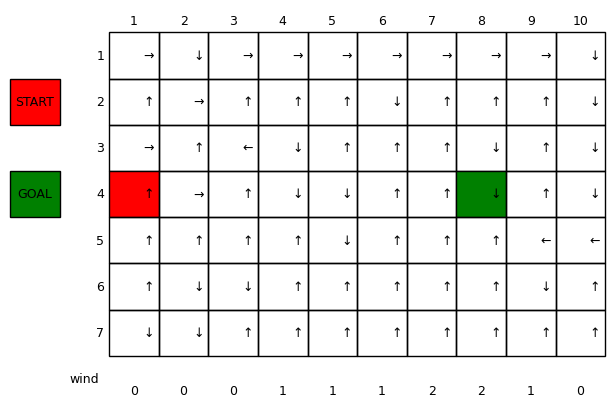

In [62]:
plot_greedy_policy(q_value_MC)